In [2]:
import pandas as pd, numpy as np
import random 
import numpy.linalg as la
import matplotlib.pyplot as plt

Anteriormente vimos que si tenemos:

Un vector $ X = (x_1, x_2, \ldots, x_p)^T$:

1. la media muestral $ \bar{x} $ de este vector se expresa como:

$$ \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i $$

2. La varianza muestral de un vector está dada por:

$$ s^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2 $$


#### Ahora, ¿qué pasa con la varianza de combinaciones lineales del vector $X$

La varianza de una combinación lineal de un conjunto de variables se puede expresar en términos de la matriz de covarianza de esas variables. 

Supongamos que tenemos un vector de constantes $ a = (a_1, a_2, \ldots, a_p)^T$ y $ X = (x_1, x_2, \ldots, x_p)^T $ tiene una matriz de covarianza denotada por $ \Sigma $. 

La **varianza** de la combinación lineal de $ X $ dada por $ a^T X $ (donde $ a^T $ denota la transposición de $ a $) se puede calcular de la siguiente manera:

$$ \text{Var}(a^T X) = a^T \Sigma a $$

#### Concepto: covarianza 'simple' entre dos variables

* La Covarianza entre dos variables $X$ y $Y$ está dada por:

$$ s_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})(y_i - \bar{y}) $$

La covarianza entre dos variables es una medida que indica el grado en el que estas dos variables varían juntas. En términos intuitivos, la covarianza nos dice si tener un valor más alto que el promedio en una variable tiende a coincidir con tener un valor más alto (o más bajo) que el promedio en la otra variable.


1. **Dirección de la Relación**:
   - **Positiva**: Si la covarianza entre dos variables es positiva, significa que cuando una variable está por encima de su media, la otra variable también tiende a estar por encima de su media. De manera similar, cuando una variable está por debajo de su media, la otra tiende a estarlo también. Esto indica una relación directa o proporcional entre las variables.
<br><br> 
   - **Negativa**: Una covarianza negativa significa que cuando una variable está por encima de su media, la otra tiende a estar por debajo de su media, y viceversa. Esto indica una relación inversa.
<br><br>
2. **Magnitud**:
   - La magnitud de la covarianza (el valor absoluto) puede darnos una idea de cuán fuerte es la relación, pero no es fácil de interpretar en términos absolutos debido a las unidades de medición de las variables, por lo que es más común usar el coeficiente de correlación, que normaliza la covarianza, para una interpretación más clara.
<br><br>
**Ejemplo Concreto:**

Supongamos analizamos la relación entre el tiempo que una persona pasa estudiando y su calificación en un examen. Si encontramos una covarianza positiva entre estas dos variables, esto podría indicar que, en general, a más horas de estudio, mejores son las calificaciones (y viceversa). 

Con esto en mente, la interpretación de una matriz de varianzas y covarianzas es más sencillo:

 Ejemplo de una mtz de varianzas y covarianzas entre variables $\Sigma$:

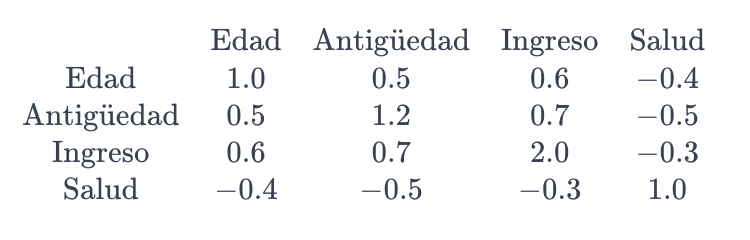

In [3]:
x=np.array([1,2,3,4,5,6,7,8,9])
y=np.array([9,8,7,6,5,4,3,2,1])
Cov=np.cov(x,y)
Cov

array([[ 7.5, -7.5],
       [-7.5,  7.5]])

In [4]:
np.corrcoef(x,y)

array([[ 1., -1.],
       [-1.,  1.]])

### Análisis de Componentes Principales

El Análisis de Componentes Principales (PCA en inglés) es una técnica estadística utilizada para simplificar la complejidad en conjuntos de datos de alta dimensión, reduciendo la cantidad de variables (mediante **combinaciones lineales**), pero al mismo tiempo conservando la mayor cantidad posible de información original. 

Se utiliza en áreas como reducción de dimensiones, visualización de datos, y en la identificación de patrones y estructuras subyacentes en los datos.

#### Intuición detrás de PCA
El objetivo principal de PCA es identificar las direcciones (o componentes principales) a lo largo de las cuales varían los datos. La idea es transformar las variables originales en un nuevo conjunto de variables, los componentes principales, que son **ortogonales (independientes) entre sí** y que capturan la **mayor parte de la variabilidad presente en los datos originales.**

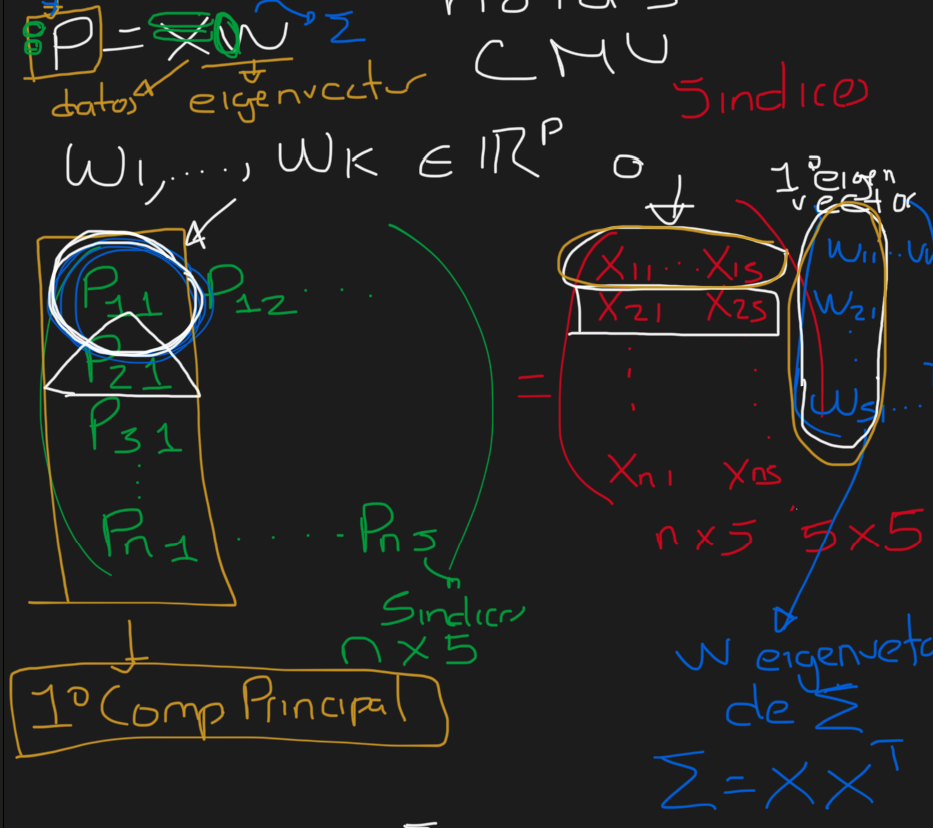

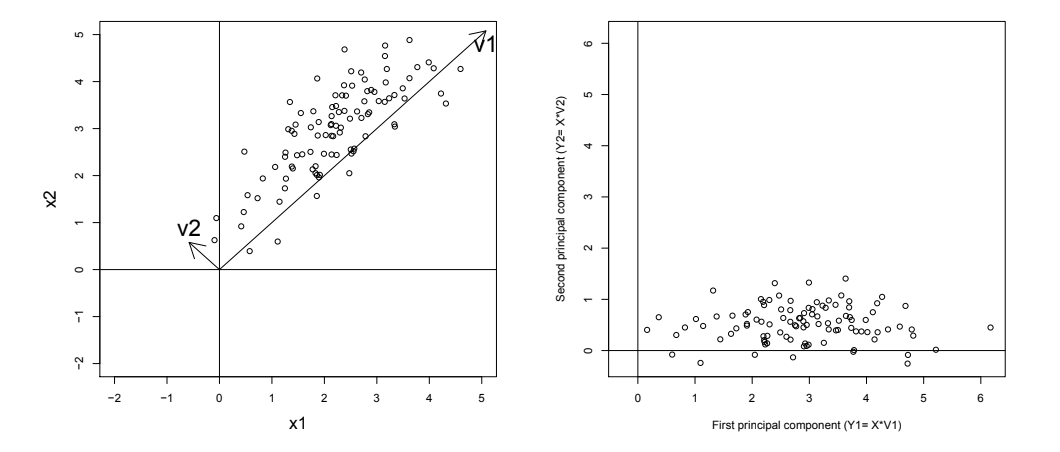

#### Planteamiento del problema a Alto Nivel

$ X = (x_1, x_2, \ldots, x_p)^T $

1. Encontrar c.lineal $\mathbf{w_1}^TX$ con **varianza máxima**
2. Encontrar otra c.lineal $\mathbf{w_2}^TX$ **no correlacionada** con c.lineal $\mathbf{w_1}^TX$ y con máxima varianza.
3. Iterar.

### PCA como problema de optimización

Para formular el Análisis de Componentes Principales (PCA) como un problema de optimización, consideramos la maximización de la varianza de los datos proyectados sobre un vector $ \mathbf{w} $ sujeto a una restricción de normalización.

Planteamiento para obtener el primer Componente Principal (PC)

1. $X = $   contiene información de $p$ variables.
<br> <br>
2. La matriz de Varianzas y Covarianzas de $X$ es una matriz $\Sigma$.
<br><br>
3. Queremos encontrar $\mathbf{w_1}$ tal que la combinación lineal $\mathbf{w_1}^TX$ tenga **varianza máxima**
<br><br>
4. Varianza de $\mathbf{w_1}^TX = \mathbf{w_1}^T \Sigma \mathbf{w_1}$
<br><br>
5. Pero...yo puedo hacer $\mathbf{w_1}^T \Sigma \mathbf{w_1}$ arbitrariamente grande multiplicando $\mathbf{w_1}$ por un escalar, por lo que es necesario meter una restricción sobre $\mathbf{w_1}$

La restricción es que $ \mathbf{w_1} $ tenga norma unitaria, es decir, $ \mathbf{w_1}^T \mathbf{w_1} = 1 $.



De modo que el problema se convierte en
$$
\begin{align}
 \underset{\mathbf{w_1}}{\text{max}} \ \mathbf{w_1}^T \Sigma \mathbf{w_1} \newline
 s.t. \mathbf{w_1}^T \mathbf{w_1} = 1
\end{align}
$$

**Paso 1: Formulación del Lagrangiano**

El Lagrangiano $ \mathcal{L} $ que incluye esta restricción se escribe como:

$$ \mathcal{L}(\mathbf{w_1}, \lambda_1) = \mathbf{w_1}^T \Sigma \mathbf{w_1} - \lambda_1 (\mathbf{w_1}^T \mathbf{w_1} - 1) $$

donde $ \lambda_1 $ es el multiplicador de Lagrange asociado con la restricción.

**Paso 2: Diferenciación del Lagrangiano**

Diferenciamos $ \mathcal{L} $ con respecto a $ \mathbf{w_1} $ y $ \lambda_1 $. Para $ \mathbf{w_1} $, la diferenciación nos da:

$$ \frac{\partial \mathcal{L}}{\partial \mathbf{w_1}} = 2 \Sigma \mathbf{w_1} - 2 \lambda_1 \mathbf{w_1} $$

Para encontrar los puntos estacionarios, establecemos esta derivada igual a cero:

$$ 2 \Sigma \mathbf{w_1} - 2 \lambda_1 \mathbf{w_1} = 0 $$

Simplificando, obtenemos:

$$ \Sigma \mathbf{w_1} = \lambda_1 \mathbf{w_1} $$

Lo que significa que $ \mathbf{w_1} $ es un eigenvector de $ \Sigma $ y $ \lambda_1 $ es el eigenvalor correspondiente.

Ahora:

$$ 
Var(\mathbf{w_1}^TX) = \mathbf{w_1}^T \Sigma \mathbf{w_1}= \mathbf{w_1}^T \lambda_1 \mathbf{w_1} = \lambda_1 \mathbf{w_1}^T \mathbf{w_1} = \lambda_1 
$$

y quiero varianza máxima. Entonces tomo el **eigenvalor más grande**



**Para el Segundo Componente Principal**:

1. Encontrar $\mathbf{w_2}^TX$ que maximice $\mathbf{w_2}^T \Sigma \mathbf{w_2}$  sujeto a que esté no correlacionada con $\mathbf{w_1}^TX$:


2. La restricción de no correlación la podemos escribir mediante cualquiera de las siguientes ecuaciones:

$$
\mathbf{w_1}^T \Sigma \mathbf{w_2} = \mathbf{w_2}^T \Sigma \mathbf{w_1}=\mathbf{w_2}^T \lambda_1 \mathbf{w_1} = \lambda_1 \mathbf{w_1}^T\mathbf{w_2} = 0
$$

Así, el problema es:

$$
\underset{\mathbf{w_2}}{\text{max}} \ \mathbf{w_2}^T \Sigma \mathbf{w_2} \\\\\\ 
$$
$$
s.t. \mathbf{w_2}^T \mathbf{w_2} = 1 \\\\ 
$$
$$
s.t. \mathbf{w_2}^T \mathbf{w_1} = 0
$$


De modo que podemos escribir el Lagrangiano como:

$$
\mathcal{L}(\mathbf{w_2}, \mathbf{w_1}, \lambda_2, \gamma ) = \mathbf{w_2}^T \Sigma \mathbf{w_2} - \lambda_2 (\mathbf{w_2}^T \mathbf{w_2} - 1) - \gamma\mathbf{w_2}^T\mathbf{w_1} $$

Derivando con respecto a $\mathbf{w_2}$ e igualando a 0:

$$
\Sigma \mathbf{w_2} -  \lambda_2 \mathbf{w_2} - \gamma\mathbf{w_1} = 0 
$$

Multiplicando esta expresión por $\mathbf{w_1}$:

$$
\mathbf{w_1}^T\Sigma \mathbf{w_2} -  \lambda_2 \mathbf{w_1}^T \mathbf{w_2} - \gamma\mathbf{w_1}^T\mathbf{w_1} = 0
$$

$$
 0 - 0 - \gamma \times 1 = 0
$$

Entonces vemos que $\gamma$ debe ser cero y entonces:

$$
\Sigma \mathbf{w_2} -  \lambda_2 \mathbf{w_2} = 0 \Rightarrow  \Sigma \mathbf{w_2} = \lambda_2 \mathbf{w_2}
$$

lo cual implica que $\mathbf{w_2}$ es también un eigenvector, y podemos escoger el eigenvector asociado al SEGUNDO eigenvalor más grande de $\Sigma$ 

Y así sucesivamente...


Notar: como tengo $p$ variables puedo calcular $p$ componentes principales.
    
Para el $k$ - ésimo PC: 

$$
Var(\mathbf{w_k}^TX) = \lambda_k ,     \qquad k = 1,2,...p
$$

**Paso 4: Selección de Componentes Principales**

* Los componentes principales se seleccionan en orden de los eigenvalores, lo que significa que el primer componente principal es el eigenvector correspondiente al mayor eigenvalor, y así sucesivamente.

* Como los PC's son ortogonales el % de la varianza retenida por los primeros $q$ PC's es:

$$
\frac{\sum_{i=1}^{q}\lambda_i}{\sum_{i=1}^{p}\lambda_i} \times 100
$$




#### Ejemplo Práctico

In [6]:
pip install pca

  Obtaining dependency information for pca from https://files.pythonhosted.org/packages/58/63/21e880ee3cee3b6f46b7d595b9e3fe2033440ff140f4aad580efd87a34b2/pca-2.0.7-py3-none-any.whl.metadata
  Obtaining dependency information for datazets from https://files.pythonhosted.org/packages/f0/37/ff89984f6c59ddcbd987886dbcca61a34985a87475d4db82159974ce0440/datazets-0.1.9-py3-none-any.whl.metadata
  Obtaining dependency information for colourmap>=1.1.15 from https://files.pythonhosted.org/packages/20/b4/7cd78fb279fa27be9a526eda91412bb1159230d115415378a189d4c61825/colourmap-1.1.17-py3-none-any.whl.metadata
  Obtaining dependency information for scatterd>=1.3.7 from https://files.pythonhosted.org/packages/6a/a9/76be12419fe5475ac69fa9856e1a33df2a73c11bf2fa4a2365b0fa12f371/scatterd-1.3.7-py3-none-any.whl.metadata
  Obtaining dependency information for adjusttext from https://files.pythonhosted.org/packages/71/0d/baaa8e9f8c14e33f353419f7c7da4c270145626f043e98740e743ece6a8e/adjustText-1.2.0-py3-none-

In [7]:
from pca import pca

In [8]:
df=pd.read_csv("municipios_vcz.csv",encoding="latin-1")
df.head()

,Clave_mun,longitud,latitud,altitud,totreg,ingtoper,Censo_y_edu,Censo_y_salud,Censo_y_ss,Censo_y_cv,...,Enigh_y_edu,Enigh_y_salud,Enigh_y_ss,Enigh_y_cv,Enigh_y_sbv,Enigh_y_ali2,Enigh_y_ing,Nb_mun,Population,Gini_coef
0,1,970033,193513,2020,7503,2550526,0.3675,0.9230,0.9152,0.6040,...,0.342191,0.550816,0.905494,0.288390,0.189470,0.220319,1.11925,Acajete,7117,0.438707
1,2,965031,194150,1740,2558,1532146,0.3753,0.9629,0.9582,0.1443,...,0.306714,0.480169,0.959326,0.089450,0.126147,0.305756,1.50103,Acatlán,2983,0.370577
2,3,945448,175654,100,77737,55300000,0.2782,0.7804,0.7487,0.4183,...,0.274846,0.261125,0.744406,0.292389,0.561117,0.229383,1.62541,Acayucan,91089,0.430602
3,4,963709,193013,260,39308,26100000,0.4237,0.6479,0.6382,0.3576,...,0.327091,0.489681,0.725265,0.087810,0.117200,0.217913,1.67230,Actopan,44150,0.394426
4,5,954624,183022,10,5017,5645295,0.3889,0.6303,0.6418,0.3117,...,0.314982,0.074335,0.769867,0.142259,0.542609,0.297072,1.57418,Acula,4630,0.396407


In [9]:
X=df.iloc[:,6:14]
X

,Censo_y_edu,Censo_y_salud,Censo_y_ss,Censo_y_cv,Censo_y_sbv,Censo_y_ali,Censo_y_ing,Censo_y_esco
0,0.3675,0.9230,0.9152,0.6040,0.7520,0.1801,0.3399,3.3900
1,0.3753,0.9629,0.9582,0.1443,0.0696,0.0797,0.5990,3.5813
2,0.2782,0.7804,0.7487,0.4183,0.5256,0.2064,0.7114,4.7598
3,0.4237,0.6479,0.6382,0.3576,0.3437,0.0509,0.6640,3.9212
4,0.3889,0.6303,0.6418,0.3117,0.8597,0.1023,1.1252,3.8657
...,...,...,...,...,...,...,...,...
205,0.1532,0.3142,0.2910,0.2195,0.2728,0.0377,1.3878,6.0991
206,0.3080,0.4747,0.5123,0.3005,0.5390,0.0668,0.8785,4.4282
207,0.3337,0.3759,0.3651,0.1676,0.3195,0.0515,0.7831,4.7655
208,0.3661,0.9606,0.9528,0.8679,0.8616,0.4877,0.1994,2.7895


#Significado

1. Censo_y_edu:  rezago educativo
2. Censo_y_salud: 
3. Censo_y_ss:  acceso a seg social
4. Censo_y_cv:   calidad de la vivienda
5. Censo_y_sbv:   servicios básicos de la vivienda
6. Censo_y_ali:  alimentación
7. Censo_y_ing:   ingreso $
8. Censo_y_esco:   años escolaridad

In [12]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler().fit(X) # (x-media)/desv.stándar
X_norm=scaler.transform(X) #efectua la estandarización
X_norm
#en PCA se aconseja estandarizar para quitar el efecto de diferentes escalas en sus columnas.

array([[ 0.46651847,  0.77129298,  0.73855219, ..., -0.31434597,
        -0.63702275, -0.39768485],
       [ 0.57136991,  0.99828569,  0.97834014, ..., -0.87077871,
         0.1352512 , -0.23088775],
       [-0.73389603, -0.03996415, -0.18992905, ..., -0.16858719,
         0.47027085,  0.79666263],
       ...,
       [ 0.01216225, -2.34118093, -2.32906062, ..., -1.02706759,
         0.68398   ,  0.80163254],
       [ 0.44769899,  0.9852009 ,  0.94822724, ...,  1.39042208,
        -1.05579732, -0.92126907],
       [ 0.5055017 ,  1.02331747,  0.99953071, ...,  1.00468783,
        -0.97770555, -0.71305607]])

In [15]:
X_norm=pd.DataFrame(X_norm)
X_norm.columns=X.columns
X_norm

,Censo_y_edu,Censo_y_salud,Censo_y_ss,Censo_y_cv,Censo_y_sbv,Censo_y_ali,Censo_y_ing,Censo_y_esco
0,0.466518,0.771293,0.738552,0.273132,0.458197,-0.314346,-0.637023,-0.397685
1,0.571370,0.998286,0.978340,-1.782627,-2.350908,-0.870779,0.135251,-0.230888
2,-0.733896,-0.039964,-0.189929,-0.557310,-0.473781,-0.168587,0.470271,0.796663
3,1.221987,-0.793762,-0.806128,-0.828758,-1.222573,-1.030393,0.328990,0.065476
4,0.754188,-0.893889,-0.786053,-1.034021,0.901544,-0.745526,1.703644,0.017085
...,...,...,...,...,...,...,...,...
205,-2.414207,-2.692195,-2.742277,-1.446336,-1.514433,-1.103549,2.486350,1.964417
206,-0.333310,-1.779104,-1.508205,-1.084107,-0.418619,-0.942273,0.968329,0.507536
207,0.012162,-2.341181,-2.329061,-1.678430,-1.322193,-1.027068,0.683980,0.801633
208,0.447699,0.985201,0.948227,1.453282,0.909366,1.390422,-1.055797,-0.921269


In [16]:
pca_model=pca(n_components=4)

In [23]:
pca_model

[scatterd] >INFO> Create scatterplot
[scatterd] >INFO> Create scatterplot


[pca] >Cleaning previous fitted model results..
[pca] >Extracting column labels from dataframe.
[pca] >Extracting row labels from dataframe.
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[4]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.
[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


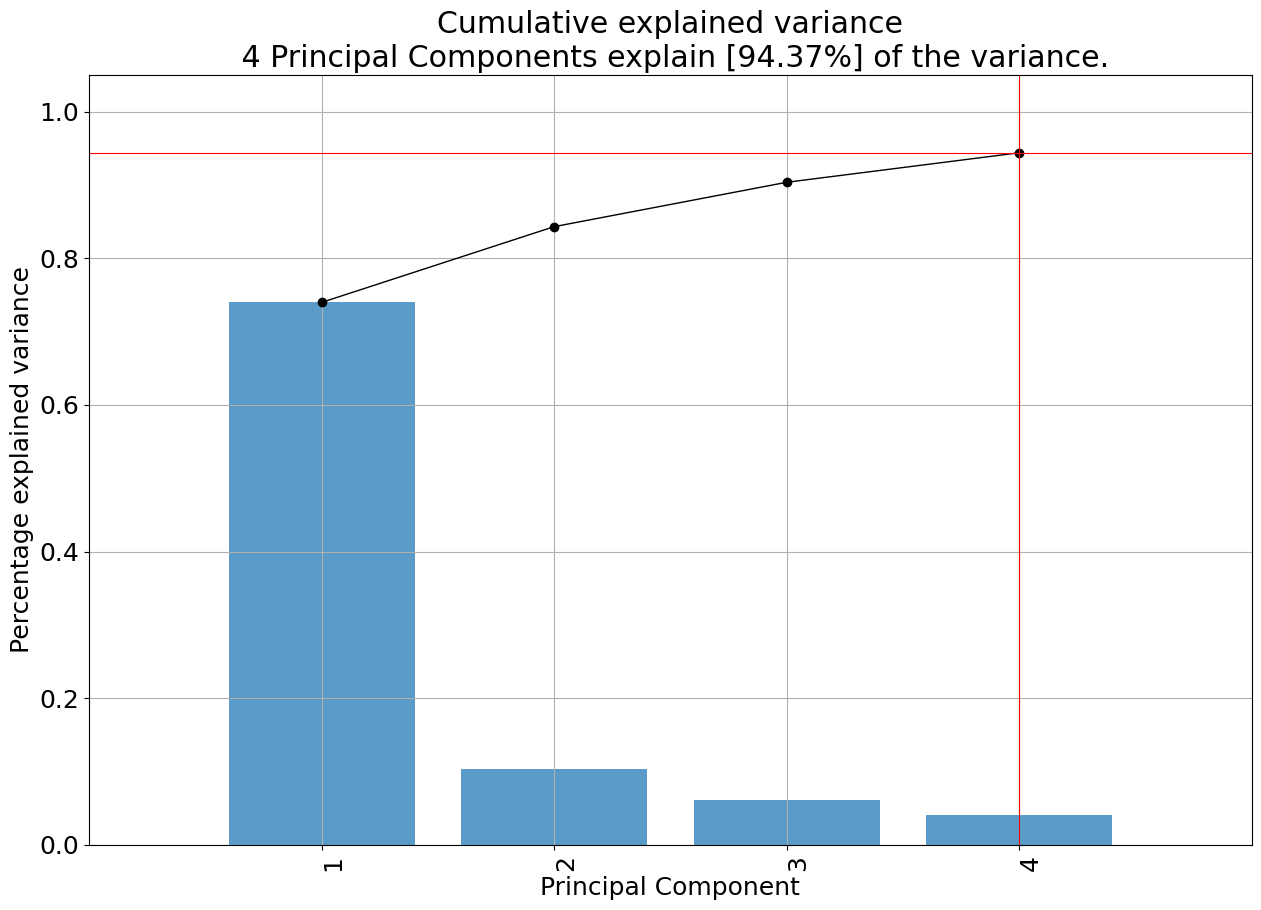

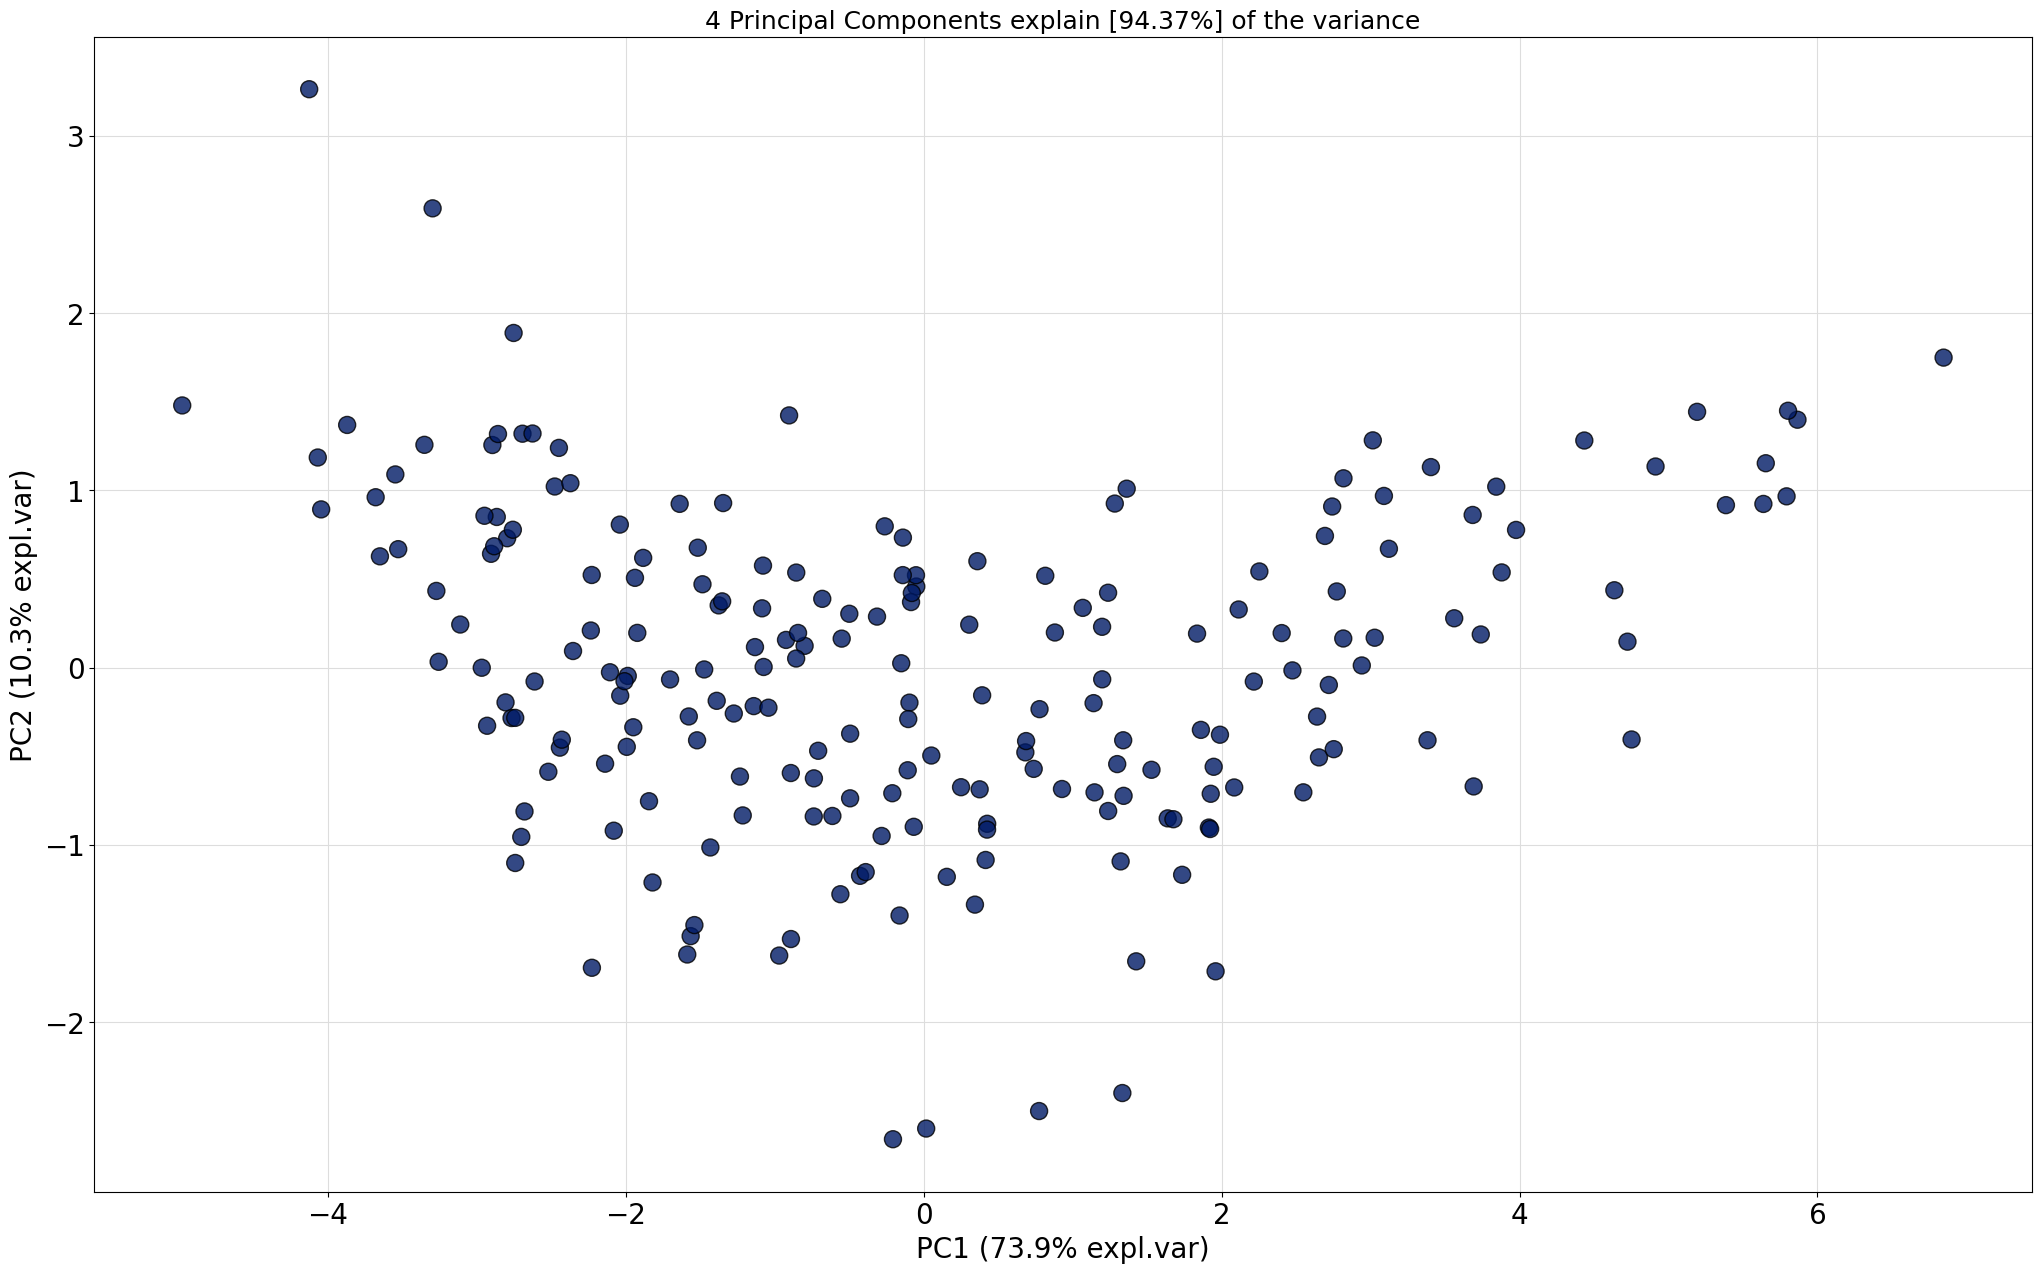

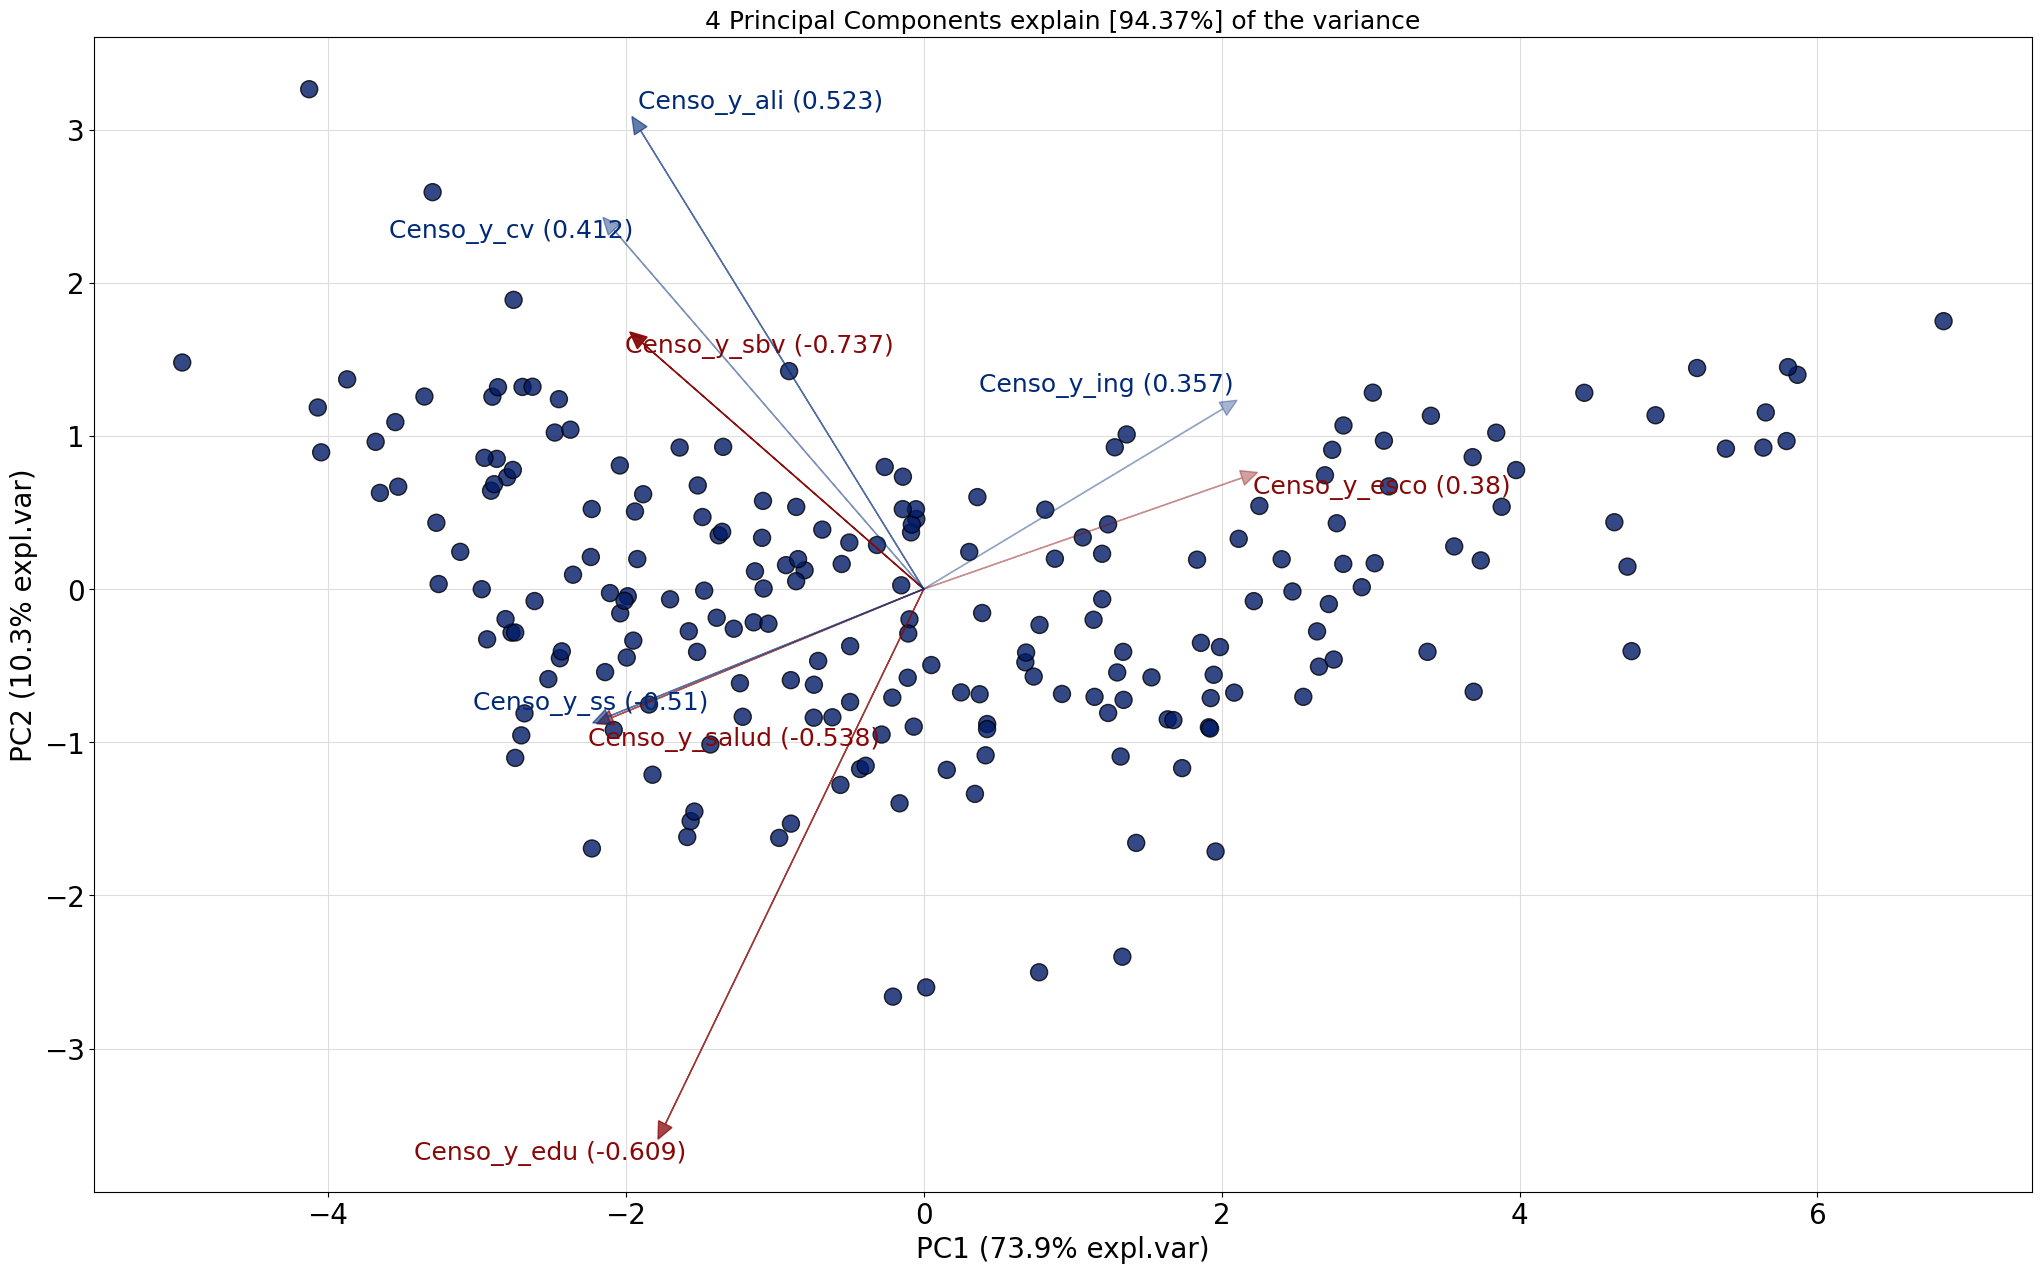

In [25]:
res=pca_model.fit_transform(X_norm)
#Graficar el % de varianza expplicado
fig,ax=pca_model.plot()

#Proyeción de los individuos (municipios) en los 2 primeros componens principales
fig, ax= pca_model.scatter(legend=False)

#Proyección de las variables en los 2 primeros componentes principales
fig,ax=pca_model.biplot(n_feat=8,legend=False,label=False)
#un biplot muestra tanto la proyección de los indiviuos como las direcciones e las variables orignales en el espacio de los componentes principales
#n_feat=8 indica que se desean mostrar 8 variables, legend=false, no se quieren etiquetas, y label=false, no se desea etiqueta en las variable



In [ ]:
#interpretación de un Biplot
#Longitud de la Flecha: La longitud es proporcional a la importancia de la variable en el componente principal. 
#Áunglo enter la flechas. Nos mide la correlación entre variable. Flechas que estén cercanas indican varfiables altamente corrlecionadas. Flechas 
#perpendiculaes indivan varibles no correlacionadas. Flechas en direcciones optuesta indivan una correlacipon negtiva. 

#Si una variable tiene un componente positiva en un eje principal y otro negativo en otro je, significa que la varible contribuen de manera diferente
# a los dos pomponentes. 


